# Итоговое задание


Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам.

#### Импорт необходимых  библиотек и загрузка датасета

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

db = pd.read_csv('stud_math.csv')

In [50]:
db.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [51]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [52]:
#Сколько у нас пропущенных значений
db.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [53]:
#у нас 13 числовых, и 17 нечисловых признаков. Разберемся сначала с числовыми

### Числовые признаки

* **age** — возраст ученика (от 15 до 22)
* **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
* **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
* **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
* **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
* **failures** — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
* **studytime, granular**  -- нет в описании, нужно выяснить, что это такое
* **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
* **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)
* **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
* **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
* **absences** — количество пропущенных занятий
* **score** — баллы по госэкзамену по математике - Целевая переменная! 


### Age

In [54]:
db.age

0      18
1      17
2      15
3      15
4      16
       ..
390    20
391    17
392    21
393    18
394    19
Name: age, Length: 395, dtype: int64

In [55]:
display(pd.DataFrame(db.age.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.age.value_counts()>10).sum())
db.loc[:, ['age']].info()

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    395 non-null int64
dtypes: int64(1)
memory usage: 3.2 KB


Пропусков нет. Можно посмотреть на распредление значений признака

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

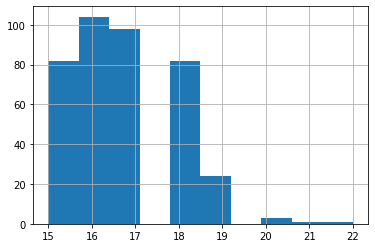

In [56]:
db.age.hist()
db.age.describe()

Распредление нормальное. Выбросов нет. Промежуточные выводы: в основном дети здают экзамен в возрасте 15-16 лет. Остальные могли не здать экзамен по причине болезни, неуспеваемости, иных проблем. Превышение возраста 15-16 лет у здающих может служить сигналом - оценка по тесту может быть хуже

### Medu

In [57]:
db.Medu

0      4.0
1      1.0
2      1.0
3      4.0
4      3.0
      ... 
390    2.0
391    3.0
392    1.0
393    3.0
394    1.0
Name: Medu, Length: 395, dtype: float64

In [58]:
display(pd.DataFrame(db.Medu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.Medu.value_counts()>10).sum())
db.loc[:, ['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    392 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


Пропусков мало - всего 2. Можно будет попробовать заполнить

Посмотрим на распредление признака

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

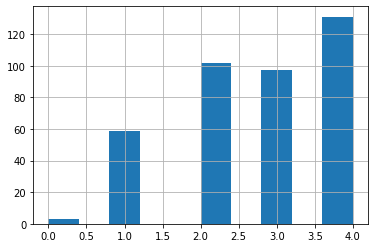

In [59]:
db.Medu.hist()
db.Medu.describe()

Медианное значение признака - 3. Зполним недостающие значения им

In [60]:
db['Medu']=db['Medu'].fillna(db.Medu.median())

In [61]:
#Проверяем
db['Medu'].isna().sum()

0

### Fedu

In [62]:
db.Fedu

0      4.0
1      1.0
2      1.0
3      2.0
4      3.0
      ... 
390    2.0
391    1.0
392    1.0
393    2.0
394    1.0
Name: Fedu, Length: 395, dtype: float64

In [63]:
display(pd.DataFrame(db.Fedu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.Fedu.value_counts()>10).sum())
db.loc[:, ['Fedu']].info()

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    371 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [64]:
db['Fedu'].isna().sum()

24

24 пропуска достаточно много, но не кретично. Можно попробовать заполнить

Смотрим на распределение признака

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

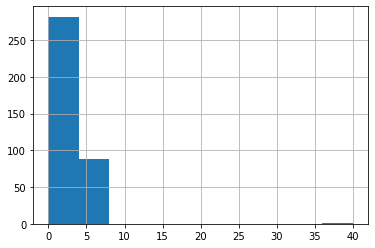

In [65]:
db.Fedu.hist()
db.Fedu.describe()

Максимальное значение равное 40 - это явная ошибка. Причем, помня, что 4 - это одно из допустимых значений, можно предположить, что это описка, и заменить 40 на 4


In [66]:
db['Fedu'] = db['Fedu'].apply(lambda x: 4.0 if x == 40.0 else x)       

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

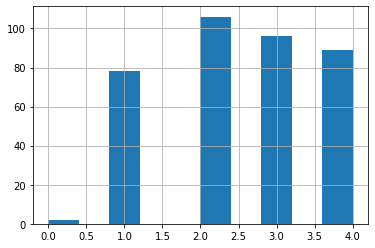

In [67]:
#Проверяем
db.Fedu.hist()
db.Fedu.describe()

Попытаемся что-то сделать с пропусками. Отработаем несколько гипотез:
* Образование отца не указано, потому что он не живет вместе с матерью и ребенком. В таком случае влияние на развитие ребенка минимально, как если бы у отца было минимальное образование, т.е 0. можно будет заменить пропуск на 0
* Если опекуном значится мать, а графе Pstatus все таки стоит Т (вместе), опять же можно предположить, что влияние отца минимально, и поставить в пропусках в графе Fedo 0
* Если в графе famrel (отношения в семье) стоят минимальные значения, то наверное тут тоже можно заменять пропуск на 0
* Если в графе "размер семьи" (famsize) пропуск, и не указано образование отца, то можно предположить, что опять же отец не виляет на воспитание и развитие ребенка, и поставить в графе Fedo 0
* Если графа образование отца не заполнена, но он работает учителем (Fjob =='teacher'), то можно смело недостающие данные в данном случае заменить на 4 (высшее образование)

In [68]:
db[(db.Fedu !=0)&(db.Fedu !=1)&(db.Fedu !=2)&(db.Fedu !=3)&(db.Fedu !=4)& (db.Pstatus == 'A')] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,-3.0,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
281,GP,M,17,U,LE3,A,3.0,NaN,teacher,services,home,mother,1.0,1.0,1.0,no,no,no,no,yes,-3.0,NaN,yes,no,4.0,4.0,4.0,3.0,19.0,50.0


In [69]:
db[(db.Fedu !=0)&(db.Fedu !=1)&(db.Fedu !=2)&(db.Fedu !=3)&(db.Fedu !=4)& (db.Pstatus == 'A') &(db.guardian == 'mother')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,-3.0,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
281,GP,M,17,U,LE3,A,3.0,NaN,teacher,services,home,mother,1.0,1.0,1.0,no,no,no,no,yes,-3.0,NaN,yes,no,4.0,4.0,4.0,3.0,19.0,50.0


In [70]:
db[(db.Fedu !=0)&(db.Fedu !=1)&(db.Fedu !=2)&(db.Fedu !=3)&(db.Fedu !=4)& (db.Pstatus == 'T') &(db.famrel <3)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [71]:
db[(db.Fedu !=0)&(db.Fedu !=1)&(db.Fedu !=2)&(db.Fedu !=3)&(db.Fedu !=4)&(db.famsize !='LE3') & (db.famsize !='GT3') ]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
195,GP,F,17,U,NaN,T,2.0,NaN,services,services,course,father,1.0,2.0,0.0,no,NaN,no,yes,yes,-6.0,yes,yes,yes,NaN,3.0,2.0,5.0,0.0,75.0
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,-3.0,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0


In [72]:
db[(db.Fedu !=0)&(db.Fedu !=1)&(db.Fedu !=2)&(db.Fedu !=3)&(db.Fedu !=4)&(db.Fjob =='teacher')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
232,GP,M,17,U,GT3,T,4.0,NaN,teacher,teacher,reputation,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,2.0,14.0,45.0
287,GP,F,17,U,GT3,T,1.0,NaN,services,teacher,reputation,mother,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,no,4.0,3.0,3.0,3.0,6.0,60.0


Очевидно, что заполнить недостающие значения в графе Fedu мы сможем только в нескольких случаях. Остальные очевидно придется отбросить. Пока что этого делать не будем до обработки всех признаков

### traveltime

In [73]:
db.traveltime

0      2.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
390    1.0
391    2.0
392    1.0
393    3.0
394    1.0
Name: traveltime, Length: 395, dtype: float64

In [74]:
display(pd.DataFrame(db.traveltime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.traveltime.value_counts()>10).sum())
db.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    367 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [75]:
db['traveltime'].isna().sum()

28

Пропусков достаточно много

Посмотрим на распредление значений признака

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

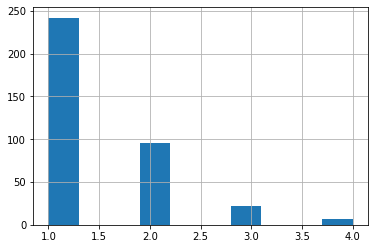

In [76]:
db.traveltime.hist()
db.traveltime.describe()

In [77]:
db[(db.traveltime != 1)&(db.traveltime != 2)&(db.traveltime != 3)&(db.traveltime != 4)&(db.reason == 'home')] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
234,GP,M,16,U,LE3,NaN,1.0,1.0,other,other,home,mother,NaN,2.0,0.0,no,NaN,yes,no,yes,-6.0,yes,yes,no,3.0,4.0,2.0,5.0,18.0,30.0
310,GP,F,19,U,LE3,T,1.0,NaN,services,services,home,other,NaN,2.0,1.0,no,no,no,yes,no,-6.0,yes,no,yes,4.0,2.0,4.0,3.0,0.0,0.0
372,MS,F,17,NaN,GT3,T,2.0,2.0,other,at_home,home,mother,NaN,3.0,0.0,no,no,no,yes,yes,-9.0,yes,no,NaN,3.0,4.0,3.0,3.0,8.0,55.0
384,MS,M,18,R,GT3,T,4.0,2.0,other,NaN,home,father,NaN,1.0,1.0,no,no,NaN,no,yes,-3.0,yes,NaN,no,5.0,4.0,3.0,3.0,14.0,25.0


Это наверное единственная возможность для заполнения пропусков. Когда не указано время пути до школы, но зато в графе причина выбора школы стоит близость от дома. Тут можно смело NaN заменять на 1

### studytime

In [78]:
db.studytime

0      2.0
1      2.0
2      2.0
3      3.0
4      2.0
      ... 
390    2.0
391    1.0
392    1.0
393    1.0
394    1.0
Name: studytime, Length: 395, dtype: float64

In [79]:
display(pd.DataFrame(db.studytime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.studytime.value_counts()>10).sum())
db.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [80]:
db['studytime'].isna().sum()

7

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

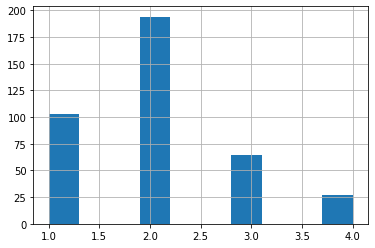

In [81]:
db.studytime.hist()
db.studytime.describe()

In [82]:
db[(db.studytime != 1)&(db.studytime != 2)&(db.studytime != 3)&(db.studytime != 4)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


В случае малого числа пропусков можно их заполнить медианным значением. Но подождем до анализа следующего признака

### studytime, granular

Это единственный признак, которого нет в описании. Для удобства сразу переименуем его

In [83]:
db.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)

In [84]:
db

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [85]:
db.studytime_granular / db.studytime

0     -3.0
1     -3.0
2     -3.0
3     -3.0
4     -3.0
      ... 
390   -3.0
391   -3.0
392   -3.0
393   -3.0
394   -3.0
Length: 395, dtype: float64

Один из столбоцов получен из другого умножением всех значений на -3. Оставлять оба столбца не имеет смысл, так как два признака линейно зависимы и это может повлять на качестве модели. Но до проведения корреляционого анализа прянять решение о том, какой столбец оставить, а какой удалить, нельзя

Пока что заполним пропущенные значения медианным значением в обоих столбцах

In [86]:
db['studytime_granular'] = db['studytime_granular'].fillna(db.studytime_granular.median())

In [87]:
db['studytime'] = db['studytime'].fillna(db.studytime.median())

In [88]:
db['studytime'].isna().sum()

0

In [89]:
db['studytime_granular'].isna().sum()

0

### failures

In [90]:
db.failures

0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
390    2.0
391    0.0
392    3.0
393    0.0
394    0.0
Name: failures, Length: 395, dtype: float64

In [91]:
display(pd.DataFrame(db.failures.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.failures.value_counts()>10).sum())
db.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    373 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [92]:
db['failures'].isna().sum()

22

In [93]:
display(pd.DataFrame(db.failures.value_counts(ascending = False)))


,failures
0.0,293
1.0,49
2.0,16
3.0,15


db.failures.hist()
db.failures.describe()

Гипотеза: посмотреть сколько учеников имеет пропуски в столбце failures, и при этом "возростные" - скорее всего они сдавали не один раз

In [95]:
db[(db.failures !=0)&(db.failures != 1)&(db.failures != 2)&(db.failures != 3) & (db.age > 17)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
261,GP,M,18,U,GT3,T,4.0,3.0,teacher,other,course,mother,NaN,2.0,NaN,no,yes,yes,no,no,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,2.0,40.0
313,GP,F,19,U,NaN,NaN,3.0,2.0,services,other,reputation,other,2.0,2.0,NaN,no,NaN,NaN,no,no,-6.0,yes,yes,yes,4.0,2.0,2.0,1.0,22.0,55.0
344,GP,F,18,U,NaN,T,2.0,3.0,at_home,other,course,NaN,1.0,3.0,NaN,no,yes,no,no,yes,-9.0,yes,yes,no,4.0,3.0,3.0,3.0,4.0,50.0


In [96]:
db[(db.failures !=0)&(db.failures != 1)&(db.failures != 2)& (db.age > 17)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,NaN,no,no,no,-6.0,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
157,GP,F,18,R,GT3,T,1.0,1.0,at_home,other,course,mother,NaN,1.0,3.0,no,yes,no,yes,no,-3.0,yes,no,no,5.0,2.0,5.0,4.0,6.0,50.0
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
261,GP,M,18,U,GT3,T,4.0,3.0,teacher,other,course,mother,NaN,2.0,NaN,no,yes,yes,no,no,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,2.0,40.0
313,GP,F,19,U,NaN,NaN,3.0,2.0,services,other,reputation,other,2.0,2.0,NaN,no,NaN,NaN,no,no,-6.0,yes,yes,yes,4.0,2.0,2.0,1.0,22.0,55.0
344,GP,F,18,U,NaN,T,2.0,3.0,at_home,other,course,NaN,1.0,3.0,NaN,no,yes,no,no,yes,-9.0,yes,yes,no,4.0,3.0,3.0,3.0,4.0,50.0
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


In [97]:
db[(db.schoolsup == 'no')] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

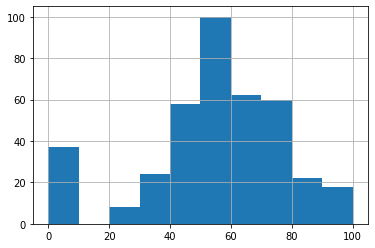

In [98]:
db.score.hist()
db.score.describe()

In [99]:
db[(db.failures !=0)&(db.failures != 1)&(db.failures != 2)&(db.failures != 3) & (db.score < 20)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,course,father,3.0,1.0,NaN,no,yes,no,yes,no,-3.0,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0


In [100]:
db[(db.failures !=0)&(db.failures != 1)&(db.failures != 2) & (db.score < 20)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,course,father,3.0,1.0,NaN,no,yes,no,yes,no,-3.0,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0
173,GP,F,16,U,GT3,T,1.0,3.0,at_home,services,home,NaN,1.0,2.0,3.0,no,no,no,yes,no,-6.0,yes,yes,yes,4.0,3.0,5.0,3.0,0.0,0.0


In [101]:
db[(db.schoolsup == 'no') & (db.failures !=0)&(db.failures != 1)&(db.failures != 2) &(db.failures != 3)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,NaN,no,no,yes,yes,yes,-6.0,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,NaN,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
158,GP,M,16,R,GT3,NaN,2.0,2.0,at_home,other,course,mother,3.0,1.0,NaN,no,no,no,no,no,-3.0,NaN,no,no,4.0,2.0,2.0,3.0,2.0,75.0


In [102]:
db[(db.failures !=0)&(db.failures != 1)&(db.score < 20)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,NaN,course,mother,NaN,1.0,2.0,no,no,no,NaN,yes,-3.0,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,course,father,3.0,1.0,NaN,no,yes,no,yes,no,-3.0,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0
173,GP,F,16,U,GT3,T,1.0,3.0,at_home,services,home,NaN,1.0,2.0,3.0,no,no,no,yes,no,-6.0,yes,yes,yes,4.0,3.0,5.0,3.0,0.0,0.0


count    332.000000
mean       0.271084
std        0.667779
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

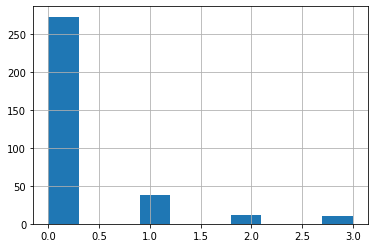

In [159]:
db.failures.hist()
db.failures.describe()

#### Выводы и гипотезы по этому признаку

Можно заполнить пропущенные значения в случае, когда возраст > 17. Это явно не первая попытка. Все кто сдавал в этом возрасте, сдавал три раза. В этом случае заполняем пропуски значением 3. Остальные видимо придется удалить


In [103]:
db[(db.score == 0)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


### famrel

In [104]:
db.famrel

0      4.0
1      5.0
2      4.0
3      3.0
4      4.0
      ... 
390    5.0
391    2.0
392    5.0
393    4.0
394    3.0
Name: famrel, Length: 395, dtype: float64

In [105]:
display(pd.DataFrame(db.famrel.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.famrel.value_counts()>10).sum())
db.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    368 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [106]:
db['famrel'].isna().sum()

27

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

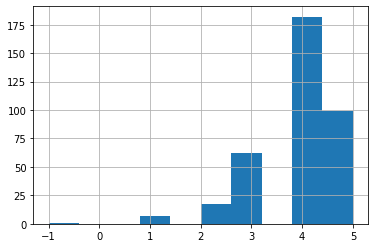

In [107]:
db.famrel.hist()
db.famrel.describe()

-1 - это скорее всего ошибка ввода. заменим на 1

In [108]:
db['famrel'] = db['famrel'].apply(lambda x: 1 if x == -1.0 else x)       

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

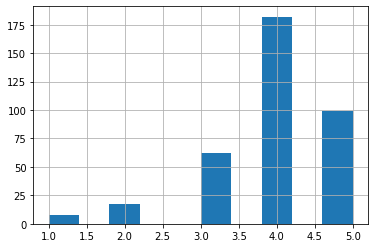

In [109]:
db.famrel.hist()
db.famrel.describe()

In [110]:
db[(db.famrel !=1)&(db.famrel != 2)&(db.famrel !=3)&(db.famrel !=4)&(db.famrel !=5)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,-3.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,-6.0,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,-12.0,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,-6.0,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0


Можно предположить, что плохие отношения в семье могут сказаться на плохом балле

In [111]:
db[(db.famrel <3)&(db.score <40)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
206,GP,F,16,U,GT3,A,3.0,1.0,services,other,course,mother,1.0,2.0,3.0,no,yes,yes,no,yes,-6.0,yes,yes,no,2.0,3.0,3.0,4.0,5.0,35.0
296,GP,F,19,U,GT3,T,4.0,4.0,health,other,reputation,other,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,2.0,3.0,4.0,2.0,0.0,0.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0


In [112]:
db[(db.score <40)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,-3.0,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,MS,M,18,R,GT3,T,4.0,2.0,other,NaN,home,father,NaN,1.0,1.0,no,no,NaN,no,yes,-3.0,yes,NaN,no,5.0,4.0,3.0,3.0,14.0,25.0
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,3.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0


но эта гипотеза не подтвердилась. Выбрасывать столбец жалко, можно попробовать заполнить медианным значением 4

### freetime 

In [113]:
db.freetime

0      3.0
1      3.0
2      3.0
3      2.0
4      3.0
      ... 
390    5.0
391    4.0
392    5.0
393    4.0
394    2.0
Name: freetime, Length: 395, dtype: float64

In [114]:
display(pd.DataFrame(db.freetime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.freetime.value_counts()>10).sum())
db.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    384 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [115]:
db['freetime'].isna().sum()

11

In [116]:
db[(db.freetime <2)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,NaN,yes,yes,-3.0,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
95,GP,F,15,R,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,4.0,1.0,yes,yes,yes,yes,yes,-12.0,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0
106,GP,F,15,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,no,5.0,1.0,2.0,3.0,8.0,40.0
111,GP,F,16,R,GT3,T,3.0,3.0,services,other,reputation,father,1.0,3.0,1.0,yes,yes,no,yes,yes,-9.0,yes,yes,no,4.0,1.0,2.0,2.0,0.0,50.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,2.0,1.0,yes,no,no,yes,yes,-6.0,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0


In [117]:
db[(db.freetime >3)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
13,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,course,mother,2.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,NaN,5.0,4.0,3.0,3.0,2.0,55.0
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,home,other,1.0,3.0,0.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


In [118]:
db[(db.freetime !=1)&(db.freetime != 2)&(db.freetime !=3)&(db.freetime !=4)&(db.freetime !=5)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,-6.0,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,-3.0,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
290,GP,M,18,U,GT3,T,4.0,NaN,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,NaN,2.0,5.0,11.0,55.0
291,GP,F,17,U,GT3,T,4.0,3.0,NaN,services,reputation,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,no,4.0,NaN,2.0,3.0,0.0,75.0
311,GP,F,19,U,GT3,T,2.0,1.0,at_home,other,other,other,3.0,2.0,0.0,no,yes,no,no,yes,-6.0,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,2.0,2.0,no,no,no,no,no,-6.0,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

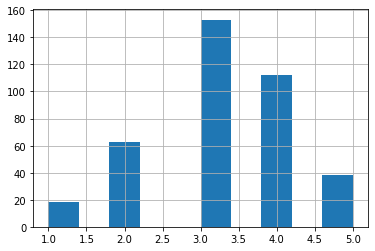

In [119]:
db.freetime.hist()
db.freetime.describe()

Явной зависимости, которую можно было бы использовать для заполнения пропусков увидеть/придумать не удается. Зполним пропуски медианным значением - 3

### goout 

In [120]:
db.goout 

0      4.0
1      3.0
2      2.0
3      2.0
4      2.0
      ... 
390    4.0
391    5.0
392    3.0
393    1.0
394    3.0
Name: goout, Length: 395, dtype: float64

In [121]:
display(pd.DataFrame(db.goout.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.goout.value_counts()>10).sum())
db.loc[:, ['goout']].info()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    387 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [122]:
db['goout'].isna().sum()

8

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

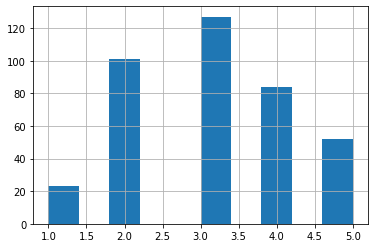

In [123]:
db.goout.hist()
db.goout.describe()

Пропусков мало, выбросов нет - заполняем средним - 3

### health 

In [124]:
db.health 

0      3.0
1      3.0
2      3.0
3      5.0
4      5.0
      ... 
390    4.0
391    2.0
392    3.0
393    5.0
394    5.0
Name: health, Length: 395, dtype: float64

In [125]:
display(pd.DataFrame(db.health.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.health.value_counts()>10).sum())
db.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    380 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [126]:
db['health'].isna().sum()

15

Возможно, состояние здоровья коррелирует с большим количеством пропущенных уроков

In [127]:
db.absences 

0        6.0
1        4.0
2       10.0
3        2.0
4        4.0
       ...  
390    212.0
391      3.0
392      3.0
393      0.0
394      5.0
Name: absences, Length: 395, dtype: float64

In [128]:
display(pd.DataFrame(db.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.absences.value_counts()>10).sum())
db.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    383 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [129]:
db[(db.absences >40)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


предположение не оправдалось - кол-во пропусков не коррелирует со здоровьем

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

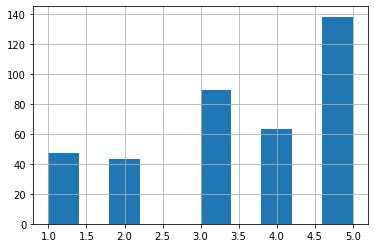

In [130]:
db.health.hist()
db.health.describe()

Выбросов нет. Заменим пропущенные значения на среднее - 4

### absences 

In [131]:
db.absences 

0        6.0
1        4.0
2       10.0
3        2.0
4        4.0
       ...  
390    212.0
391      3.0
392      3.0
393      0.0
394      5.0
Name: absences, Length: 395, dtype: float64

In [132]:
display(pd.DataFrame(db.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.absences.value_counts()>10).sum())
db.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    383 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [133]:
db['absences'].isna().sum()

12

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

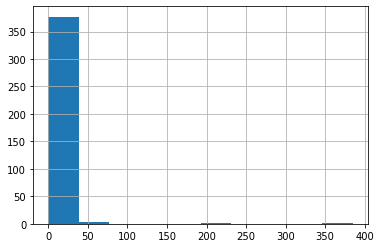

In [134]:
db.absences.hist()
db.absences.describe()

Есть два выброса - 384 и 212. так как эти значения не сопряжены с плохим состоянием здоровья, можно предположить, что это ошибки ввода. Предположить в чем состояла ошибка не представляется возможным. Заменим на среднее - 4

In [135]:
db['absences'] = db['absences'].apply(lambda x: 4 if x == 212 or x == 385 else x)       

In [136]:
display(pd.DataFrame(db.absences.value_counts()))

,absences
0.0,111
2.0,60
4.0,55
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


count    383.000000
mean       5.741514
std        8.068329
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

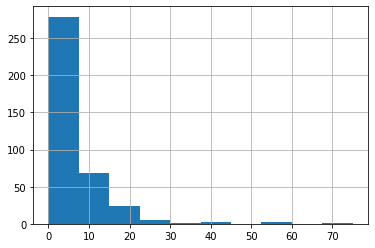

In [137]:
db.absences.hist()
db.absences.describe()

Пропущенные значения можно заменить на среднее - 4

### score  - целевая переменная

In [138]:
db.score

0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
390    45.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: score, Length: 395, dtype: float64

In [139]:
display(pd.DataFrame(db.score.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.score.value_counts()>10).sum())
db.loc[:, ['score']].info()

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Значений, встретившихся в столбце более 10 раз: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
score    389 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [140]:
db['score'].isna().sum()

6

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

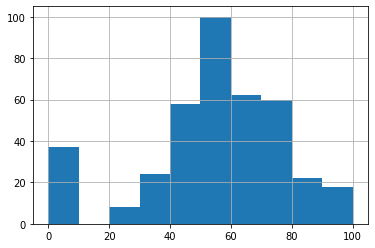

In [141]:
db.score.hist()
db.score.describe()

In [142]:
db[(db.score == 0)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


Кажется, что значение score равное 0 - это явная ошибка. Понять, в чем тут дело - не получается. Единственный вывод - человек просто не пришел на экзамен. С другой стороны, среди таких учеников есть те, кто пересдавал несколько раз. Но и они вряд ли могли сдать с нулем баллов. В общем - ноль - это неявка, и эти строки не нужны нам для модели. Удаляем.

In [143]:
db = db.loc[db.score > 0]

In [144]:
db[(db.score == 0)] 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score


count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

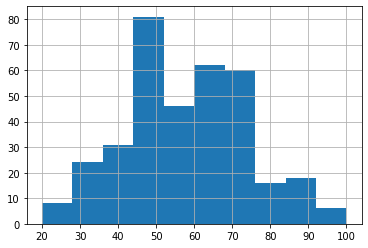

In [145]:
db.score.hist()
db.score.describe()

### заполняем что можно, удаляем что нельзя заполнить

In [146]:
#Fedu
#db = db.loc[db.score > 0]
#db = db.loc[(db.Fedu !=0)&(db.Fedu !=1)&(db.Fedu !=2)&(db.Fedu !=3)&(db.Fedu !=4)&(db.Fjob =='teacher')]

#db.Fedu = db.Fedu.apply(lambda x: 4 if x !=0 & x!=1 & x!=2 & x !=3 & x !=4 &  else x)



In [148]:
db.loc[(db.Fjob == 'teacher')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0


но для начала все таки построим матрицу корреляций

### Матрица корреляций

In [149]:
db.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.123376,-0.130010,0.095370,-0.011270,0.235875,0.011270,0.072918,0.004837,0.123638,-0.056173,0.206842,-0.131542
Medu,-0.123376,1.000000,0.603558,-0.165832,0.069187,-0.206275,-0.069187,-0.006641,0.020751,0.079928,-0.037931,0.075038,0.184533
Fedu,-0.130010,0.603558,1.000000,-0.145471,-0.010555,-0.268901,0.010555,-0.016694,-0.030449,0.044127,0.018671,0.030024,0.135268
traveltime,0.095370,-0.165832,-0.145471,1.000000,-0.100253,0.091757,0.100253,-0.029299,-0.023067,0.029374,-0.000092,-0.006608,-0.075516
studytime,-0.011270,0.069187,-0.010555,-0.100253,1.000000,-0.154732,-1.000000,0.056319,-0.126650,-0.029455,-0.084753,-0.077980,0.139605
failures,0.235875,-0.206275,-0.268901,0.091757,-0.154732,1.000000,0.154732,0.006870,0.127391,0.126770,0.064083,0.132953,-0.289377
studytime_granular,0.011270,-0.069187,0.010555,0.100253,-1.000000,0.154732,1.000000,-0.056319,0.126650,0.029455,0.084753,0.077980,-0.139605
famrel,0.072918,-0.006641,-0.016694,-0.029299,0.056319,0.006870,-0.056319,1.000000,0.158597,0.045341,0.107055,-0.061600,0.040590
freetime,0.004837,0.020751,-0.030449,-0.023067,-0.126650,0.127391,0.126650,0.158597,1.000000,0.296392,0.072729,-0.082458,-0.012457
goout,0.123638,0.079928,0.044127,0.029374,-0.029455,0.126770,0.029455,0.045341,0.296392,1.000000,-0.010343,0.045208,-0.182286


#### Корреляция с целевой переменной и между собой

##### Топ-8 лучших корреляций с целевой переменной
* Failures -0.289
* Absences -0.215
* Medu 0.184
* goout -0.182
* studytime_granular -0.14
* Fedu 0.135
* Age -0.131


##### Кандидаты на удаление:

* Traveltime -0.0755
* famrel 0.04
* freetime -0.0125
* health -0.075
* studytime 0.14

##### Корреляция признаков между собой

Признаки (кроме studytime и studytime_granular) слабо скоррелированы между собой. Оба studytime скоррелированы полностью (линейно-зависимы) по понятным причинам - один получен из другого умножением на константу. Принять решение о том, какой из гих оставить сложно. Умножение на отрицательную константу привел к тому, что мы имеем обратную корреляцию с целевой переменной: чем больше ученик занимается помимо школы, тем хуже у него бал. С одной стороны, это можно интерпретировать так : у ученика не остается времени на подготовку к математике, он устает. Но с другой стороны, большее время на занятия помимо школы может говорить о том, что ученик больше занимается той же математикой. Я больше склонен принять первый вариант. Поэтому удаляя "обычный" studytime





##### Удаление столбцов с плохой корреляцией с целевой переменной

In [153]:
db.drop(['traveltime','famrel','freetime','health','studytime'], inplace = True, axis = 'columns')

KeyError: "['traveltime' 'famrel' 'freetime' 'health' 'studytime'] not found in axis"

In [154]:
db

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,goout,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,0.0,no,yes,no,no,no,-6.0,yes,yes,no,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,2.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,2.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,4.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,0.0,no,no,no,no,no,-3.0,yes,yes,no,5.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,1.0,0.0,50.0


#### Заполнение пустых значений в оставшихся числовых столбцах и удаление того, что нельзя заполнить

Столбец Fedu из оставленных обладает одной из самых слабых коррляцией с целевой переменной. Так как в нем 24 пропуска и более менее желехно мы сможем заполнить только 4-5 из них (подставить 4, если отец работает учителем), то оставшиееся 20 - это слишком много кандидатов на удаление строк. Для нашего небольгого дата-фрейма это критично. Придется пожертвовать этим столбцом.

In [155]:
db.drop(['Fedu'], inplace = True, axis = 1)

В столбце failures много пропусков (24), но это столбец с наибольшей корреляцией с целевой переменной. Придется его оствлять и заполнять пропуски там, где возможно, а остальные пропущенные значения - удалять.

Попытка понять закономерности как влияет возоаст и другие переменные на кол-во неудач не увенчалось успехом. Учитывая важность переменной и тот факт, что подавляющее большинство сдает с первого раза, заполняем пропуски значением 0.

In [166]:
db['failures']=db['failures'].fillna(db.failures.median())

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [167]:
db['failures'].isna().sum() 

0

In [168]:
db['absences'].isna().sum() 

10

In [169]:
#заменяем на среднее
db['absences']=db['absences'].fillna(db.absences.median())

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [170]:
db['absences'].isna().sum() 

0

In [171]:
db['goout'].isna().sum() 

6

In [172]:
#заполняем средним
db['goout']=db['goout'].fillna(db.goout.median())

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [173]:
db['goout'].isna().sum() 

0

In [174]:
db['age'].isna().sum() 

0

## Номинативные переменные

* **school** — аббревиатура школы, в которой учится ученик
* **sex** — пол ученика ('F' - женский, 'M' - мужской)
* **address** — тип адреса ученика ('U' - городской, 'R' - за городом)
* **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
* **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
* **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
* **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
* **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
* **schoolsup** — дополнительная образовательная поддержка (yes или no)
* **famsup** — семейная образовательная поддержка (yes или no)
* **paid** — дополнительные платные занятия по математике (yes или no)
* **activities** — дополнительные внеучебные занятия (yes или no)
* **nursery** — посещал детский сад (yes или no)
* **higher** — хочет получить высшее образование (yes или no)
* **internet** — наличие интернета дома (yes или no)
* **romantic** — в романтических отношениях (yes или no)


#### school

db.school

In [177]:
display(pd.DataFrame(db.school.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.school.value_counts()>10).sum())
db.loc[:, ['school']].info()

,school
GP,311
MS,41


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
school    352 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [178]:
db['school'].isna().sum() 

0

Пропусков нет. явный кадидат на перекодирование в числовые значения 0 или 1

#### sex

In [180]:
db.sex

0      F
1      F
2      F
3      F
4      F
      ..
390    M
391    M
392    M
393    M
394    M
Name: sex, Length: 352, dtype: object

In [181]:
display(pd.DataFrame(db.sex.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.sex.value_counts()>10).sum())
db.loc[:, ['sex']].info()

,sex
F,182
M,170


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
sex    352 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [182]:
db['sex'].isna().sum() 

0

Пропусков нет. явный кадидат на перекодирование в числовые значения 0 или 1

#### address

db.address

In [184]:
display(pd.DataFrame(db.address.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.address.value_counts()>10).sum())
db.loc[:, ['address']].info()

,address
U,265
R,73


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
address    338 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [185]:
db['address'].isna().sum() 

14

Пропуски заполним средним - большая часть живет в городе. явный кадидат на перекодирование в числовые значения 0 или 1

#### Pstatus

In [186]:
db.Pstatus

0        A
1      NaN
2        T
3        T
4        T
      ... 
390      A
391      T
392      T
393      T
394      T
Name: Pstatus, Length: 352, dtype: object

In [187]:
display(pd.DataFrame(db.Pstatus.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.Pstatus.value_counts()>10).sum())
db.loc[:, ['Pstatus']].info()

,Pstatus
T,277
A,34


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    311 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [188]:
db['Pstatus'].isna().sum() 

41

Очень много пропусков - явный кандидат на удаление

#### Mjob

In [189]:
db.Mjob

0       at_home
1       at_home
2       at_home
3        health
4         other
         ...   
390    services
391    services
392       other
393    services
394       other
Name: Mjob, Length: 352, dtype: object

In [193]:
display(pd.DataFrame(db.Mjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.Mjob.value_counts()>10).sum())
db.loc[:, ['Mjob']].info()

,Mjob
other,115
services,90
teacher,51
at_home,49
health,30


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
Mjob    335 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [194]:
db['Mjob'].isna().sum() 

17

Можно попробовать заменить пропуски на наиболее часто встречающийся ответ - other. Кандидат на перекодирование в числа от 1 до 5

#### Fjob

In [195]:
db.Fjob

0       teacher
1         other
2         other
3           NaN
4         other
         ...   
390    services
391    services
392       other
393       other
394     at_home
Name: Fjob, Length: 352, dtype: object

In [196]:
display(pd.DataFrame(db.Fjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.Fjob.value_counts()>10).sum())
db.loc[:, ['Fjob']].info()

,Fjob
other,176
services,89
teacher,26
health,15
at_home,14


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
Fjob    320 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [197]:
db['Fjob'].isna().sum() 

32

Очень много пропусков. Учитывая, что все что связано с отцом в меньшей степени влияет на значение целевой переменной - явный кандидат на удаление

#### reason

In [198]:
db.reason

0      course
1      course
2       other
3        home
4        home
        ...  
390    course
391    course
392    course
393    course
394       NaN
Name: reason, Length: 352, dtype: object

In [201]:
display(pd.DataFrame(db.reason.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.reason.value_counts()>10).sum())
db.loc[:, ['reason']].info()

,reason
course,119
reputation,96
home,89
other,33


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
reason    337 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [200]:
db['reason'].isna().sum() 

15

Можно попробовать заменить пропуски на наиболее часто встречающийся ответ - course. Кандидат на перекодирование в числа от 1 до 4

#### guardian

In [202]:
db.guardian

0      mother
1      father
2      mother
3      mother
4      father
        ...  
390       NaN
391    mother
392       NaN
393    mother
394    father
Name: guardian, Length: 352, dtype: object

In [203]:
display(pd.DataFrame(db.guardian.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.guardian.value_counts()>10).sum())
db.loc[:, ['guardian']].info()

,guardian
mother,225
father,78
other,20


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
guardian    323 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [204]:
db['guardian'].isna().sum() 

29

Пропусков много. Либо на удаление, либо перекодируем в 1 и 2 и заменим пропуски на среднее

#### schoolsup

In [205]:
db.schoolsup

0      yes
1       no
2      yes
3       no
4       no
      ... 
390     no
391     no
392    NaN
393     no
394    NaN
Name: schoolsup, Length: 352, dtype: object

In [206]:
display(pd.DataFrame(db.schoolsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.schoolsup.value_counts()>10).sum())
db.loc[:, ['schoolsup']].info()

,schoolsup
no,295
yes,48


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    343 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [207]:
db['schoolsup'].isna().sum() 

9

Кодируем 0-1, пропуски меняем на среднее

#### famsup

In [208]:
db.famsup

0       no
1      yes
2       no
3      yes
4      yes
      ... 
390    yes
391     no
392     no
393     no
394     no
Name: famsup, Length: 352, dtype: object

In [209]:
display(pd.DataFrame(db.famsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.famsup.value_counts()>10).sum())
db.loc[:, ['famsup']].info()

,famsup
yes,196
no,120


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
famsup    316 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [210]:
db['famsup'].isna().sum() 

36

Пропусков много. Сильной разницы в кол-ве тех или иных ответов нет. Кандидат на удаление

#### paid 

In [211]:
db.paid 

0       no
1       no
2      NaN
3      yes
4      yes
      ... 
390    yes
391     no
392     no
393     no
394     no
Name: paid, Length: 352, dtype: object

In [212]:
display(pd.DataFrame(db.paid.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.paid.value_counts()>10).sum())
db.loc[:, ['paid']].info()

,paid
no,170
yes,146


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
paid    316 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [213]:
db['paid'].isna().sum() 

36

Пропусков много - кандидат на удаление

#### activities

In [214]:
db.activities 

0       no
1       no
2       no
3      yes
4       no
      ... 
390     no
391     no
392     no
393    NaN
394     no
Name: activities, Length: 352, dtype: object

In [215]:
display(pd.DataFrame(db.activities.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.activities.value_counts()>10).sum())
db.loc[:, ['activities']].info()

,activities
yes,172
no,168


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
activities    340 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [216]:
db['activities'].isna().sum() 

12

Пропусков мало. но заполнить средним не получится - оба ответа присутствуют в датафрейме практически поровну. Если признак будут коррелировать с целевой переменной - либо удалить строки, либо пропуски заполниить рандомными 0 и 1 (после перекодирования признака в числа)

#### nursery 

In [217]:
db.nursery 

0      yes
1       no
2      yes
3      yes
4      yes
      ... 
390    yes
391     no
392     no
393     no
394    yes
Name: nursery, Length: 352, dtype: object

In [218]:
display(pd.DataFrame(db.nursery.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.nursery.value_counts()>10).sum())
db.loc[:, ['nursery']].info()

,nursery
yes,272
no,68


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
nursery    340 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [219]:
db['nursery'].isna().sum() 

12

Перекодировать в числа, пропуски заполнить наиболее часто встречающимся значением

#### higher 

In [220]:
db.higher 

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
390    yes
391    yes
392    NaN
393    yes
394    yes
Name: higher, Length: 352, dtype: object

In [221]:
display(pd.DataFrame(db.higher.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.higher.value_counts()>10).sum())
db.loc[:, ['higher']].info()

,higher
yes,320
no,13


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
higher    333 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [222]:
db['higher'].isna().sum() 

19

Перекодировать в числовой формат. Пропуски заполнить наиболее часто встречающимся значением

#### internet 

In [223]:
db.internet 

0      NaN
1      yes
2      yes
3      yes
4       no
      ... 
390     no
391    yes
392     no
393    yes
394    yes
Name: internet, Length: 352, dtype: object

In [224]:
display(pd.DataFrame(db.internet.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.internet.value_counts()>10).sum())
db.loc[:, ['internet']].info()

,internet
yes,274
no,49


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
internet    323 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [225]:
db['internet'].isna().sum() 

29

Кандидат на удаление. Либо - перекодировать в числа и заполнить пропуски наиболее часто встречающимся

#### romantic 

In [226]:
db.romantic 

0       no
1       no
2      NaN
3      yes
4       no
      ... 
390     no
391     no
392     no
393     no
394     no
Name: romantic, Length: 352, dtype: object

In [227]:
display(pd.DataFrame(db.romantic.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.romantic.value_counts()>10).sum())
db.loc[:, ['romantic']].info()

,romantic
no,219
yes,104


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
romantic    323 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [228]:
db['romantic'].isna().sum() 

29

Кандидат на удаление. или перекодировать в числа и заполниить пропуски наиболее часто встречающимся

#### Анализ номинативных переменных с помощью boxplot

In [229]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=db.loc[db.loc[:, column].isin(db.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

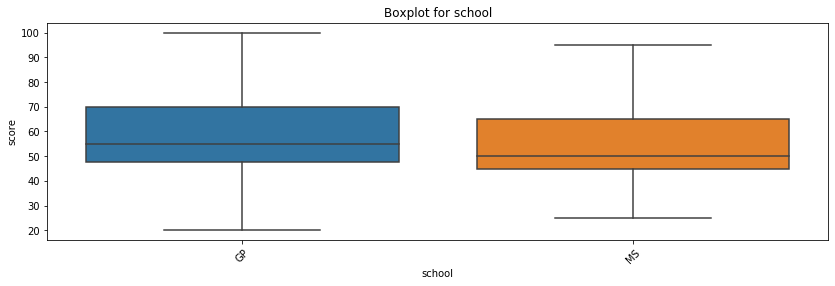

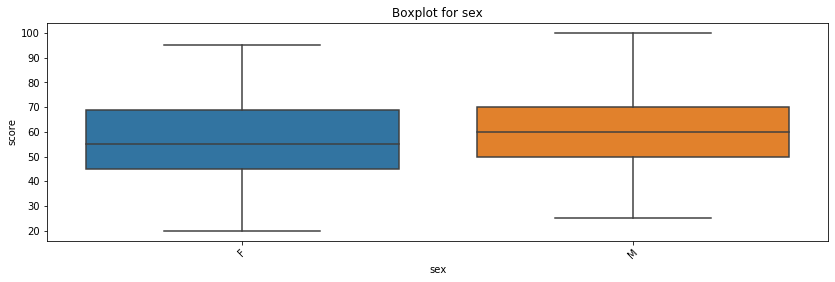

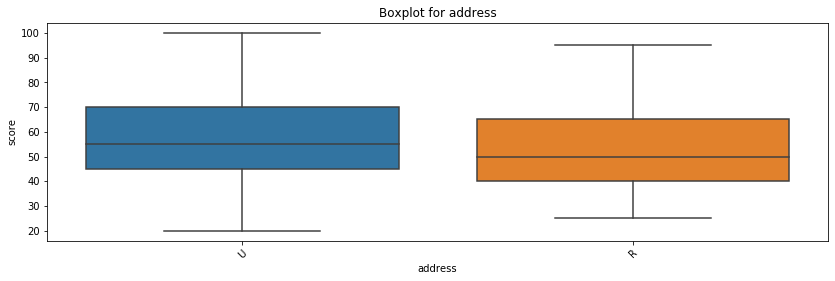

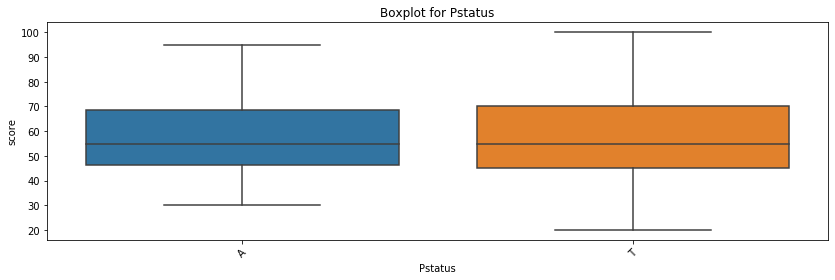

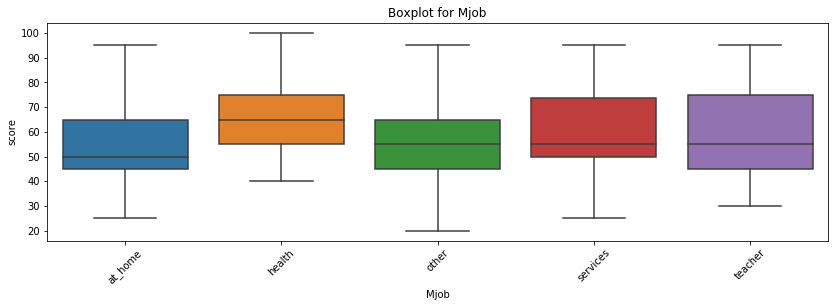

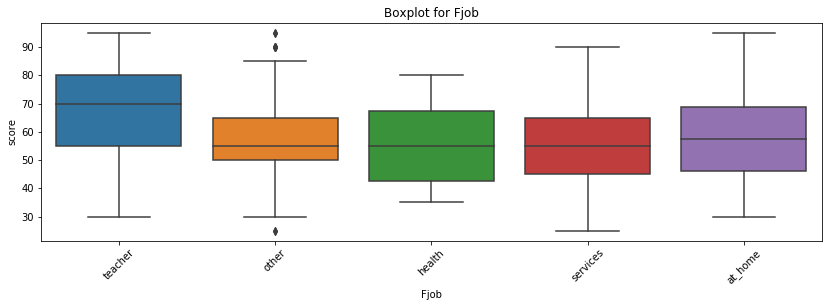

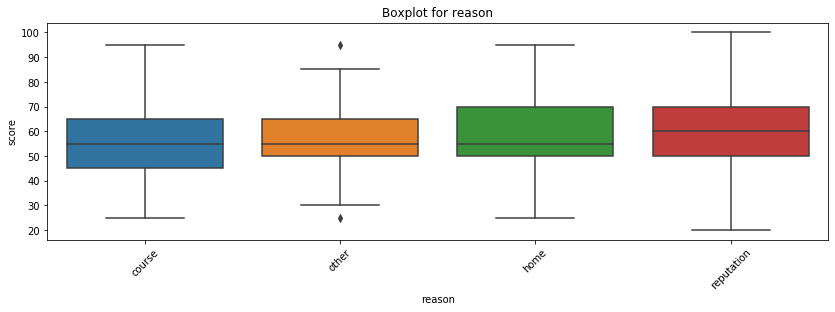

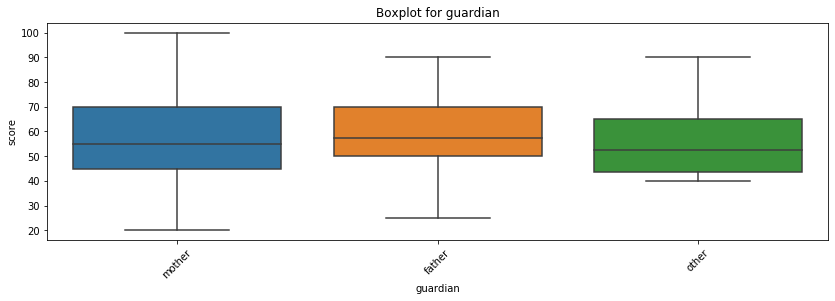

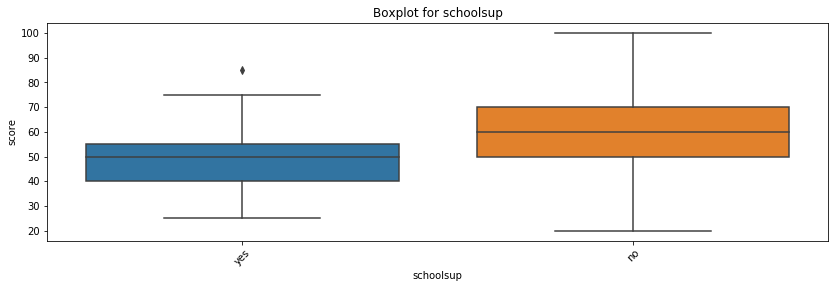

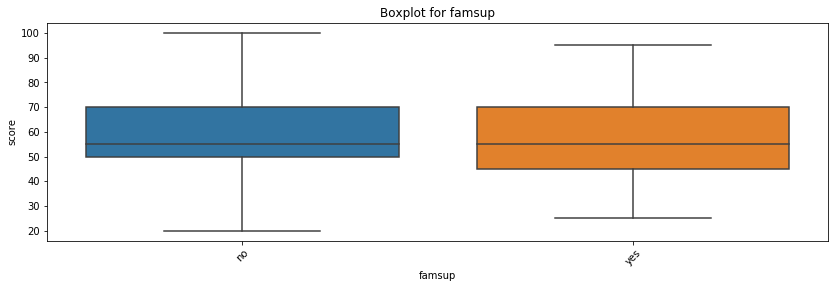

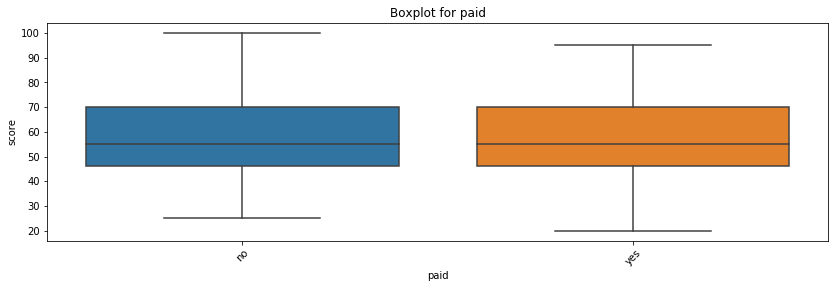

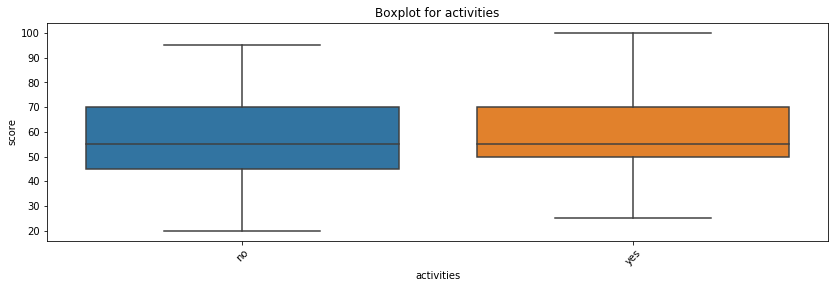

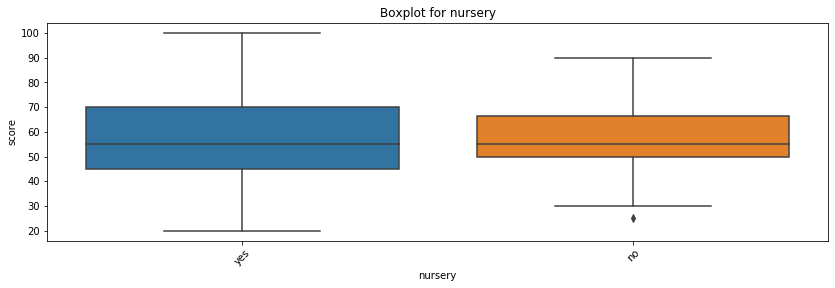

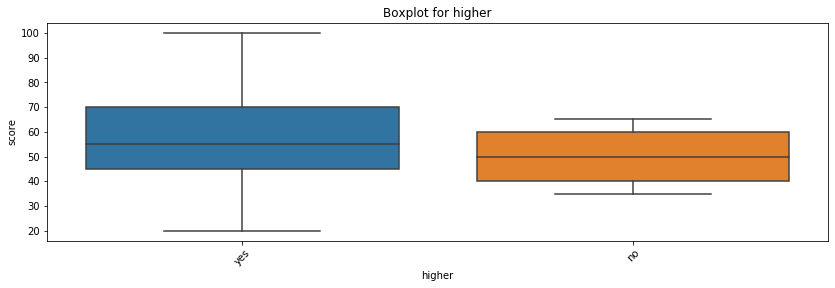

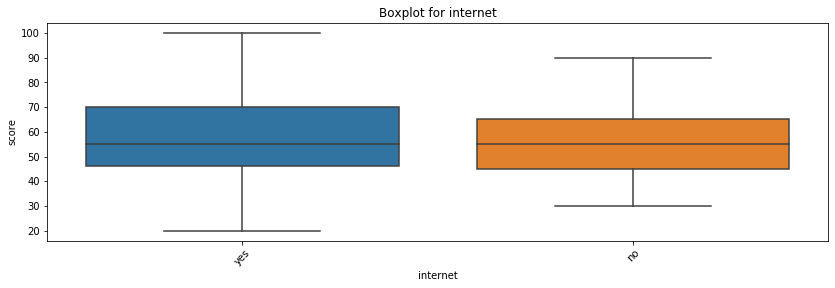

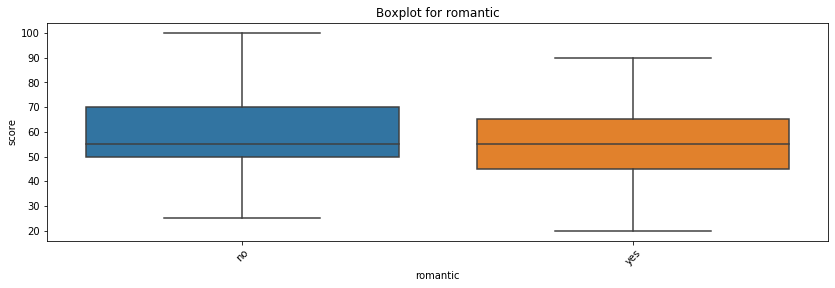

In [230]:
for col in ['school', 'sex', 'address', 'Pstatus', 'Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

По графикам видно, что на оценку по математике могут влиять следующие параметры: 

* school
* address
* mjob
* fjob
* schoolsup
* higher

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:

In [231]:
def get_stat_dif(column):
    cols = db.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(db.loc[db.loc[:, column] == comb[0], 'score'], 
                        db.loc[db.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [232]:
for col in ['school', 'sex', 'address', 'Pstatus', 'Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:    
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup


Статистически значимых парметров 4:
* address
* Mjob
* Fjob
* schoolsup

Заполним в них пропуски и переведем в численные значения

#### address

In [233]:
# Адрес
display(pd.DataFrame(db.address.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.address.value_counts()>10).sum())
db.loc[:, ['address']].info()

,address
U,265
R,73


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
address    338 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [235]:
db['address'].isna().sum() 

14

In [236]:
db['address']=db['address'].fillna('U')

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [237]:
db['address'].isna().sum() 

0

In [238]:
display(pd.DataFrame(db.address.value_counts()))

,address
U,279
R,73


In [239]:
address = {
    'U': 1,
    'R': 2
}

db['address'] = db['address'].map(address)

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [240]:
display(pd.DataFrame(db.address.value_counts()))

,address
1,279
2,73


#### Mjob

In [241]:
display(pd.DataFrame(db.Mjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.Mjob.value_counts()>10).sum())
db.loc[:, ['Mjob']].info()

,Mjob
other,115
services,90
teacher,51
at_home,49
health,30


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
Mjob    335 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [242]:
db['Mjob'].isna().sum() 

17

In [243]:
#заменим пропуски на наиболее часто встречающееся значение
db['Mjob']=db['Mjob'].fillna('other')

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [245]:
db['Mjob'].isna().sum() 

0

In [246]:
display(pd.DataFrame(db.Mjob.value_counts()))

,Mjob
other,132
services,90
teacher,51
at_home,49
health,30


In [247]:
#перекодируем в числовые признаки
mjob = {
    'other': 1,
    'services': 2,
    'teacher': 3,
    'at_home': 4,
    'health': 5
}

db['Mjob'] = db['Mjob'].map(mjob)

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [248]:
display(pd.DataFrame(db.Mjob.value_counts()))

,Mjob
1,132
2,90
3,51
4,49
5,30


Fjob

In [249]:
display(pd.DataFrame(db.Fjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.Fjob.value_counts()>10).sum())
db.loc[:, ['Fjob']].info()

,Fjob
other,176
services,89
teacher,26
health,15
at_home,14


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
Fjob    320 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [251]:
db['Fjob'].isna().sum() 

32

In [252]:
#Пропусков много, но критирий оказался значимый - меням пустые на наиболее часто встречающийся - other
db['Fjob']=db['Fjob'].fillna('other')

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [253]:
db['Fjob'].isna().sum() 

0

In [254]:
display(pd.DataFrame(db.Fjob.value_counts()))

,Fjob
other,208
services,89
teacher,26
health,15
at_home,14


In [255]:
#перекодируем признак. функцию можно использовать из предыдущего шага
db['Fjob'] = db['Fjob'].map(mjob)

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [256]:
display(pd.DataFrame(db.Fjob.value_counts()))

,Fjob
1,208
2,89
3,26
5,15
4,14


### schoolsup

In [257]:
display(pd.DataFrame(db.schoolsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (db.schoolsup.value_counts()>10).sum())
db.loc[:, ['schoolsup']].info()

,schoolsup
no,295
yes,48


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    343 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [258]:
display(pd.DataFrame(db.schoolsup.value_counts()))

,schoolsup
no,295
yes,48


In [259]:
#Меняем пропуски на наиболее часто встречающееся значение - no
db['schoolsup']=db['schoolsup'].fillna('no')

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [261]:
db['schoolsup'].isna().sum() 

0

In [262]:
#Перекодируем признак
schoolsup = {
    'no': 1,
    'yes': 2
}

db['schoolsup'] = db['schoolsup'].map(schoolsup)

D:\Users\melon\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [263]:
display(pd.DataFrame(db.schoolsup.value_counts()))

,schoolsup
1,304
2,48


#### Финализируем датафрейм

In [268]:
db_for_model_prev = db.loc[:, ['address', 'Mjob', 'Fjob', 'schoolsup', 'Medu','failures','absences','goout','age','score']]
db_for_model_prev.head()

,address,Mjob,Fjob,schoolsup,Medu,failures,absences,goout,age,score
0,1,4,3,2,4.0,0.0,6.0,4.0,18,30.0
1,1,4,1,1,1.0,0.0,4.0,3.0,17,30.0
2,1,4,1,2,1.0,3.0,10.0,2.0,15,50.0
3,1,5,1,1,4.0,0.0,2.0,2.0,15,75.0
4,1,1,1,1,3.0,0.0,4.0,2.0,16,50.0


In [269]:
db_for_model_prev.corr()

,address,Mjob,Fjob,schoolsup,Medu,failures,absences,goout,age,score
address,1.000000,0.020171,-0.049149,-0.019490,-0.156779,0.089774,0.044559,-0.059767,0.149462,-0.139105
Mjob,0.020171,1.000000,0.104117,-0.047484,0.100877,-0.007780,-0.083514,0.005720,-0.006482,0.084279
Fjob,-0.049149,0.104117,1.000000,0.116711,0.088189,-0.029534,-0.019494,-0.006755,-0.021369,0.043368
schoolsup,-0.019490,-0.047484,0.116711,1.000000,-0.053329,0.060152,0.006624,-0.031324,-0.253514,-0.239106
Medu,-0.156779,0.100877,0.088189,-0.053329,1.000000,-0.205450,0.075390,0.078894,-0.123376,0.184533
failures,0.089774,-0.007780,-0.029534,0.060152,-0.205450,1.000000,0.128066,0.122500,0.236688,-0.286925
absences,0.044559,-0.083514,-0.019494,0.006624,0.075390,0.128066,1.000000,0.042072,0.204871,-0.213974
goout,-0.059767,0.005720,-0.006755,-0.031324,0.078894,0.122500,0.042072,1.000000,0.123597,-0.179913
age,0.149462,-0.006482,-0.021369,-0.253514,-0.123376,0.236688,0.204871,0.123597,1.000000,-0.131542
score,-0.139105,0.084279,0.043368,-0.239106,0.184533,-0.286925,-0.213974,-0.179913,-0.131542,1.000000


In [270]:
db_for_model = db.loc[:, ['address', 'Mjob', 'Fjob', 'schoolsup', 'Medu','failures','absences','goout','age']]
db_for_model.head()

,address,Mjob,Fjob,schoolsup,Medu,failures,absences,goout,age
0,1,4,3,2,4.0,0.0,6.0,4.0,18
1,1,4,1,1,1.0,0.0,4.0,3.0,17
2,1,4,1,2,1.0,3.0,10.0,2.0,15
3,1,5,1,1,4.0,0.0,2.0,2.0,15
4,1,1,1,1,3.0,0.0,4.0,2.0,16


## Выводы

* Пустых значений для датафрейма такого размера достаточно много
* Выбросов почти нет - в основном в результате ошибки ввода
* Все параметры, связанные с матерью ребенка больше вляют на целевую переменную, чем связанные с отцом. Возможное объяснение - матери принимают большое участие в воспитании ребенка
* Параметры, которые предлагается использовать для построения модели: address, Mjob, Fjob, schoolsup, Medu,failures,absences, goout,age
* Отрицательная корреляция с возрастом, кол-вом пропущенных уроков и кол-вом попыток понятна. Чем старше - тем вероятность плохого бала увеличивается (плохо учился, оставался на "второй год"), чем больше попыток - тем хуже знает предмет. 
* Отрицательная корреляция с кол-вом времени, проведенным с друзьями (параметр goout) очевидно можно объяснить тем, что чем больше проводит времени с друзьями, тем меньше времени уделяет учебе
* При построении матрицы корреляций уже после перекодирования номинативных признаков в числовые появляются с трудом объяснимые отрицательные корреляции (schoolsup) или слабые корреляции (Mjob и Fjob). Возможно нужно в данных случаях было использовать метод get_dummies

